In [168]:
import numpy as np
import matplotlib.pyplot as plt

### a) Generate N = 10000 random numbers from [0, 1]:

In [169]:
N_train = 10000
N_valid = 2000
N_test = 2000
np.random.seed(41)

X_train = np.random.rand(N_train,1)
y_train = np.sqrt(1+X_train)

X_valid = np.random.rand(N_valid,1)
y_valid = np.sqrt(1+X_valid)

X_test = np.random.rand(N_test,1)
y_test = np.sqrt(1+X_test)

print("X train shape is ", X_train.shape)
print("y train shape is ", y_train.shape)  

X train shape is  (10000, 1)
y train shape is  (10000, 1)


In [170]:
np.random.seed(1)

b = np.random.normal()
w = np.random.normal()
print("b is ", b)
print("w is ", w)

b is  1.6243453636632417
w is  -0.6117564136500754


### b) Do linear regression on your generated data using stochastic gradient descent (implement yourself).

In [171]:
def mse(a, ahat):
    mse = np.mean(np.square(a - ahat))
    return mse

In [172]:
# loss function for one observation
def loss_i(x, y, w, b):
    yhat = w*x + b
    loss = np.square(yhat - y)
    return yhat, loss

In [173]:
# gradients for w and b
def grads_i(x, y, yhat):
    dw = 1/2 *(yhat - y)*x
    db = 1/2 *(yhat - y)
    
    grads = {
        'dw': dw,
        'db': db
    }
    return grads

In [174]:
# shuffle 2 arrays keeping (x,y) pairs relation 
def shuffle(x_arr,y_arr):
    n = len(x_arr)
    # concatenate two arrays
    merged_arr = np.concatenate((x_arr, y_arr), axis=1)
    # shuffle
    np.random.shuffle(merged_arr)
    # split and reshape for keeping dims
    x_arr = merged_arr.T[0].reshape(n, 1)
    y_arr = merged_arr.T[1].reshape(n, 1)
    
    return (x_arr, y_arr)

In [175]:
def sgd(X, y, w, b, lr, num_epoch, print_losses=True):
    n = len(X)
    losses = []
    for j in range(num_epoch):
        (X, y) = shuffle(X, y)
        loss_sum = 0  
        
        for i in range(n):
            # compute loss
            (yhat_i, loss) = loss_i(X[i], y[i], w, b)
            loss_sum +=loss
            # compute w, b gradients
            grads = grads_i(X[i], y[i], yhat_i)
            # update params
            w = w - lr*grads['dw']
            b = b - lr*grads['db']
             
        loss_sum = loss_sum/n
        losses.append(loss_sum)
        
        if print_losses:
            print("Loss in epoch ", j, loss_sum) 
        
    params = {
        'w': w,
        'b': b
    }
    
    return params, losses

In [176]:
def predict(X, w, b):
    # vector multiplication and broadcasting
    yhat = w*X + b
    return yhat

In [177]:
def plot_losses(losses, lr):
    losses = np.squeeze(losses)
    plt.plot(losses)
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.title("Learning rate is " + str(lr))
    plt.show()

In [178]:
(params, losses) = sgd(X_train, y_train, w, b, 0.01, 10)

Loss in epoch  0 [0.01426487]
Loss in epoch  1 [4.74183095e-05]
Loss in epoch  2 [2.78722286e-05]
Loss in epoch  3 [2.78456404e-05]
Loss in epoch  4 [2.78352326e-05]
Loss in epoch  5 [2.78481851e-05]
Loss in epoch  6 [2.78382152e-05]
Loss in epoch  7 [2.78143356e-05]
Loss in epoch  8 [2.78530219e-05]
Loss in epoch  9 [2.78463027e-05]


In [179]:
def model(X_train, y_train, X_test, y_test, w, b, lr, num_epoch, bs=None, print_losses=True, print_params=True, print_lr_plt=True):
    # get parameters
    if bs is None:
        (params, losses) = sgd(X_train, y_train, w, b, lr, num_epoch, print_losses=print_losses)
    else:
        (params, losses) = mbgd(X_train, y_train, w, b, lr, num_epoch, bs, print_losses=print_losses)
        
    w = params["w"]
    b = params["b"]

    # predic
    yhat_train = predict(X_train, w, b)
    yhat_test = predict(X_test, w, b)

    # print train/test Errors
    if print_params:
        print("train MSE: ", mse(y_train, yhat_train))
        print("test MSE: ", mse(y_test, yhat_test))
        print("w is ", np.squeeze(w))
        print("b is ", np.squeeze(b))
        
    if print_lr_plt:
        plot_losses(losses, lr)

Loss in epoch  0 [0.01427632]
Loss in epoch  1 [4.76562802e-05]
Loss in epoch  2 [2.78313536e-05]
Loss in epoch  3 [2.7829918e-05]
Loss in epoch  4 [2.78388583e-05]
Loss in epoch  5 [2.78692418e-05]
Loss in epoch  6 [2.78422957e-05]
Loss in epoch  7 [2.78465729e-05]
Loss in epoch  8 [2.7821512e-05]
Loss in epoch  9 [2.78544154e-05]
train MSE:  2.7751344461994843e-05
test MSE:  2.7662975828330708e-05
w is  0.4123043425150892
b is  1.0129160137759432


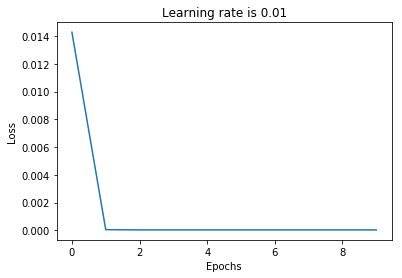

In [180]:
model(X_train, y_train, X_test, y_test, w, b, lr=0.01, num_epoch=10)

In [181]:
#we can choose number of epochs=4, because after it loss changes in a very small number
num_epoch_sgd=4

In [182]:
# tuning learning rate
learning_rates = [0.9, 0.5, 0.1, 0.01, 0.001, 0.0001]
for i in learning_rates:
    print("Learning rate: ", i)
    model(X_train, y_train, X_valid, y_valid, w, b, lr=0.1, num_epoch=num_epoch_sgd, print_lr_plt=False, print_losses=False)
    print('\n' + "-------------------------------------------------------" + '\n')

Learning rate:  0.9
train MSE:  2.8268477083140376e-05
test MSE:  2.822529099880734e-05
w is  0.41278636950678566
b is  1.0132770574634713

-------------------------------------------------------

Learning rate:  0.5
train MSE:  2.995838830276948e-05
test MSE:  3.0073931924456585e-05
w is  0.41340027786359107
b is  1.010825317478944

-------------------------------------------------------

Learning rate:  0.1
train MSE:  2.796063478816663e-05
test MSE:  2.7900791304385797e-05
w is  0.41086148455253557
b is  1.0138355075158185

-------------------------------------------------------

Learning rate:  0.01
train MSE:  2.780831561888738e-05
test MSE:  2.7818570516449228e-05
w is  0.4124391899974325
b is  1.0124996460057603

-------------------------------------------------------

Learning rate:  0.001
train MSE:  3.120972679318956e-05
test MSE:  3.107787351258686e-05
w is  0.4118333046554628
b is  1.014910948260065

-------------------------------------------------------

Learning rate:  0

In [204]:
# test MSE is relative smaller when lr=0.01, so
lr_sgd=0.01

In [205]:
(params, losses) = sgd(X_train, y_train, w, b, lr=lr_sgd, num_epoch=num_epoch_sgd, print_losses=False)
y_pred_sgd = predict(X_test, params['w'], params['b'])

### c) Do linear regression on your generated data using mini-bacth gradient descent (implement yourself).

In [206]:
# loss function for one batch
def loss_i(X, y, w, b):
    yhat = w*X + b
    loss = np.mean(np.square(yhat - y))
    return yhat, loss

In [207]:
# gradients for w and b
def grads_batch(x, y, yhat):
    bs = len(x)
    dw = 1/(2*bs) *(yhat - y).T.dot(x)
    db = 1/(2*bs) *np.sum(yhat - y)
    
    grads = {
        'dw': dw,
        'db': db
    }
    return grads

In [208]:
def mbgd(X, y, w, b, lr, num_epoch, bs, print_losses=True):
    num_iter = np.ceil(len(X)/bs)
    
    losses = []

    for j in range(num_epoch):
        (X, y) = shuffle(X, y)
        loss_sum = 0  
        
        for i in range(1, int(num_iter)+1):
            #if you want X[a:b] and b is out of bounds X array, it will return X[a:c], where c<b, without throwing an error  
            X_batch = X[(i-1)*bs : i*bs]
            y_batch = y[(i-1)*bs : i*bs]
            # compute loss
            (yhat, loss) = loss_i(X_batch, y_batch, w, b )
            loss_sum += loss
            # compute w, b gradients
            grads = grads_batch(X_batch, y_batch, yhat)
            # update params
            w = w - lr*grads['dw']
            b = b - lr*grads['db']
             
        loss_sum = loss_sum/num_iter
        losses.append(loss_sum)
        
        if print_losses:
            if num_epoch>100 and j%100==0:
                print("Loss in epoch ", j, loss_sum)
            
            elif num_epoch>20 and num_epoch<=100 and j%5==0:
                print("Loss in epoch ", j, loss_sum)
                
            elif num_epoch<=20:
                print("Loss in epoch ", j, loss_sum)    
        
    params = {
        'w': w,
        'b': b
    }
    
    return params, losses

In [209]:
(params, losses) = mbgd(X_train, y_train, w, b, lr=0.01, num_epoch=1001, bs=100)

Loss in epoch  0 0.09254348269867353
Loss in epoch  100 0.00015525306669168977
Loss in epoch  200 2.7920363285965567e-05
Loss in epoch  300 2.7740693258792758e-05
Loss in epoch  400 2.773977159672656e-05
Loss in epoch  500 2.774014413807105e-05
Loss in epoch  600 2.7740113288882722e-05
Loss in epoch  700 2.7740140061818567e-05
Loss in epoch  800 2.774001975796426e-05
Loss in epoch  900 2.7739677556704946e-05
Loss in epoch  1000 2.774003763467427e-05


In [210]:
#we can choose number of epochs=300, because after it loss changes in a very small number
num_epoch_mbgd=300

In [211]:
# tuning learning rate
learning_rates = [0.9, 0.5, 0.1, 0.01, 0.005, 0.001]
for i in learning_rates:
    print("Learning rate: ", i)
    model(X_train, y_train, X_valid, y_valid, w, b, lr=0.01, num_epoch=num_epoch_mbgd, bs=100, print_lr_plt=False, print_losses=False)
    print('\n' + "-------------------------------------------------------" + '\n')

Learning rate:  0.9
train MSE:  2.773853783691418e-05
test MSE:  2.7724037932346782e-05
w is  0.41206391674942233
b is  1.012937866922004

-------------------------------------------------------

Learning rate:  0.5
train MSE:  2.773853674663383e-05
test MSE:  2.7724015392925952e-05
w is  0.41206445852294005
b is  1.0129381546903278

-------------------------------------------------------

Learning rate:  0.1
train MSE:  2.7738537028203958e-05
test MSE:  2.7724171647846694e-05
w is  0.41206295389461667
b is  1.0129357857305352

-------------------------------------------------------

Learning rate:  0.01
train MSE:  2.7738599051113434e-05
test MSE:  2.7723756641904173e-05
w is  0.41206697357200484
b is  1.0129430947539366

-------------------------------------------------------

Learning rate:  0.005
train MSE:  2.7738560467841887e-05
test MSE:  2.772387830803222e-05
w is  0.4120651240913809
b is  1.0129406969047927

-------------------------------------------------------

Learning rat

In [212]:
# test MSE is nearly equal in all cases, so we can just choose lr=0.1
lr_mbgd=0.1

In [213]:
# tuning batch size
batch_sizes = [10, 100, 300, 500, 1000, 3000]
for i in batch_sizes:
    print("Batch size: ", i)
    model(X_train, y_train, X_valid, y_valid, w, b, lr=lr_mbgd, num_epoch=num_epoch_mbgd, bs=i, print_lr_plt=False, print_losses=False)
    print('\n' + "-------------------------------------------------------" + '\n')

Batch size:  10
train MSE:  2.7844953921548377e-05
test MSE:  2.7855106515967928e-05
w is  0.4122422807516018
b is  1.0125211361370274

-------------------------------------------------------

Batch size:  100
train MSE:  2.7739041255296332e-05
test MSE:  2.7724770882141826e-05
w is  0.4121365920476384
b is  1.0129257158196145

-------------------------------------------------------

Batch size:  300
train MSE:  2.7739857342382058e-05
test MSE:  2.7725116579435527e-05
w is  0.4121474193576537
b is  1.0129320319730841

-------------------------------------------------------

Batch size:  500
train MSE:  2.7738893645001495e-05
test MSE:  2.772712349991972e-05
w is  0.4121068818593667
b is  1.012888648323078

-------------------------------------------------------

Batch size:  1000
train MSE:  2.773853675455924e-05
test MSE:  2.7723998768320817e-05
w is  0.41206481132473216
b is  1.0129383854371976

-------------------------------------------------------

Batch size:  3000
train MSE:  6.

In [214]:
#we can choose batch size=1000, with fixed lr=0.1 and num_epoch=300
bs_mbgd=1000

In [215]:

(params, losses) = mbgd(X_train, y_train, w, b, lr=lr_mbgd, num_epoch=num_epoch_mbgd, bs=bs_mbgd, print_losses=False)
y_pred_mbgd = predict(X_test, params['w'], params['b'])

### d) Do linear regression on your generated data using tensorflow.

In [216]:
import tensorflow as tf

In [217]:
x_tf = tf.placeholder(tf.float32, shape=(None, 1), name='x_label')
y_tf = tf.placeholder(tf.float32, shape=(None, 1), name='y_label')
y_pred_tf = tf.placeholder(tf.float32, shape=(None, 1), name='y_label')

w_tf = tf.Variable(w, name='w')
b_tf = tf.Variable(b, name='b')

In [218]:
def linear_regression(X, y, w, b):
    y_pred = tf.add(tf.multiply(w, X), b)
    loss = tf.reduce_mean(tf.square(y_pred - y))
        
    return y_pred, loss

In [219]:
def train(X_train, y_train, X_test, y_test, lr, num_epoch):
    y_pred, loss = linear_regression(x_tf, y_tf, w_tf, b_tf)

    optimizer = tf.train.GradientDescentOptimizer(lr)
    train_op = optimizer.minimize(loss)
    init = tf.global_variables_initializer() 

    with tf.Session() as session:
        session.run(init)
        feed_dict = {x_tf: X_train, y_tf: y_train}
        print('initial w is ', session.run(w_tf))
        print('initial b is ', session.run(b_tf))

        for j in range(num_epoch):
            session.run(train_op, feed_dict)
            
            if j%50==0:
                print("Loss in epoch ", j, " is ", session.run(loss, feed_dict))
                
        y_pred = session.run(y_pred, {x_tf : X_train})
        
        print("train MSE: ",  session.run(loss, feed_dict))
        print("test MSE: ", session.run(loss, feed_dict={x_tf: X_test, y_tf: y_test}))
        print("w is ", session.run(w_tf))
        print("b is ", session.run(b_tf))

        # save the variable in the disk
        saved_path = saver.save(session, './saved_variable')

    plt.scatter(X_train, y_train)
    plt.plot(X_train, y_pred, color='red')
    plt.xlim(0, 1)
    plt.ylim(0, 2)
    plt.savefig('plot.png')

In [220]:
# create saver object
saver = tf.train.Saver()

initial w is  -0.6117564
initial b is  1.6243454
Loss in epoch  0  is  0.09302748
Loss in epoch  50  is  0.024227692
Loss in epoch  100  is  0.0064888075
Loss in epoch  150  is  0.0017527629
Loss in epoch  200  is  0.00048829825
Loss in epoch  250  is  0.00015070145
Loss in epoch  300  is  6.0568393e-05
Loss in epoch  350  is  3.6503567e-05
Loss in epoch  400  is  3.0078518e-05
Loss in epoch  450  is  2.836312e-05
Loss in epoch  500  is  2.7905091e-05
Loss in epoch  550  is  2.7782798e-05
train MSE:  2.7782798e-05
test MSE:  2.7683753e-05
w is  0.41139215
b is  1.0132948


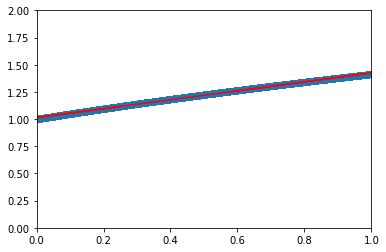

In [221]:
train(X_train, y_train, X_test, y_test, 0.1, 551)

In [222]:
init = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(init)
    saver.restore(session, './saved_variable')
    
    # print the loaded variable
    w_tf_restored, b_tf_restored = session.run([w_tf, b_tf])
    
    #predict y values for test data using saved w, b
    y_pred, loss = linear_regression(X_test, y_test, w_tf_restored, b_tf_restored)
    y_pred_tf = session.run(y_pred)
    
    print('w = ', w_tf_restored)
    print('w = ', b_tf_restored)    
print(y_pred_tf)

INFO:tensorflow:Restoring parameters from ./saved_variable
w =  0.41139215
w =  1.0132948
[[1.3457842]
 [1.0249375]
 [1.2954688]
 ...
 [1.1737128]
 [1.2720871]
 [1.0553604]]


### e) Sketch the graphs of all approximations on one graph.

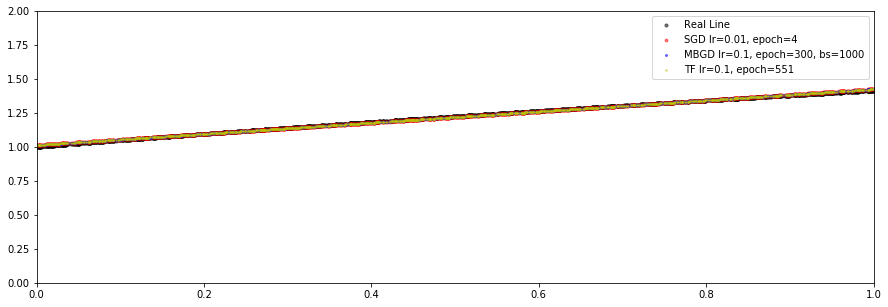

In [224]:
plt.figure(figsize=(15,5))

plt.scatter(X_test, y_test, color='k', label='Real Line', s=10, alpha=0.5)
plt.scatter(X_test, y_pred_sgd, color='r', label='SGD lr=0.01, epoch=4', s=8, alpha=0.5)
plt.scatter(X_test, y_pred_mbgd, color='b', label='MBGD lr=0.1, epoch=300, bs=1000', s=4, alpha=0.5)
plt.scatter(X_test, y_pred_tf, color='y', label='TF lr=0.1, epoch=551', s=2, alpha=0.5)

plt.xlim(0, 1)
plt.ylim(0, 2)  

plt.legend()
plt.show()

### f) Compare all solutions with the first degree Taylor approximation of the function √ 1 + x.

In [225]:
# let's take the aprroximations near the point 0.5 
T1 = np.sqrt(1+0.5) + 1/(2 * np.sqrt(1+0.5)) * (X_test-0.5)
T1[:5]

array([[1.35056924],
       [1.03217443],
       [1.30063828],
       [1.05000486],
       [1.02517399]])

#### Comparing Taylor approximation with SGD

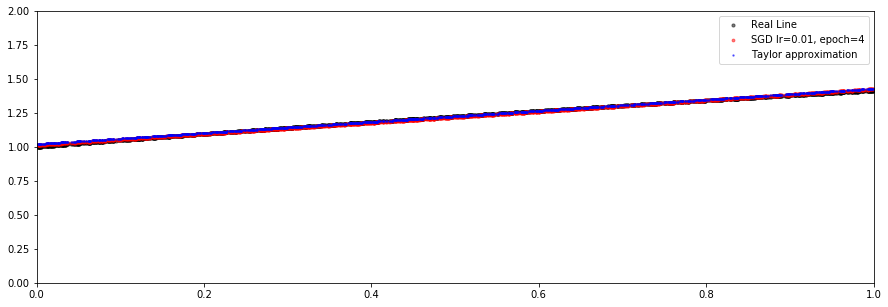

In [228]:
plt.figure(figsize=(15,5))

plt.scatter(X_test, y_test, color='k', label='Real Line', s=10, alpha=0.5)
plt.scatter(X_test, y_pred_sgd, color='r', label='SGD lr=0.01, epoch=4', s=8, alpha=0.5)
plt.scatter(X_test, T1, color='b', label='Taylor approximation', s=2, alpha=0.5)
 
plt.xlim(0, 1)
plt.ylim(0, 2)      

plt.legend()
plt.show()

#### Comparing Taylor approximation with MBGD

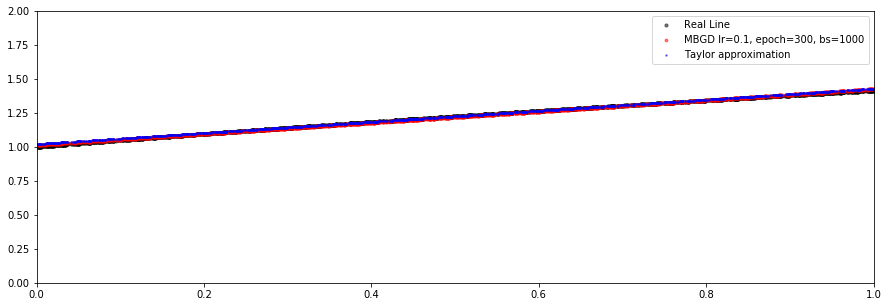

In [234]:
plt.figure(figsize=(15,5))

plt.scatter(X_test, y_test, color='k', label='Real Line', s=10, alpha=0.5)
plt.scatter(X_test, y_pred_mbgd, color='r', label='MBGD lr=0.1, epoch=300, bs=1000', s=8, alpha=0.5)
plt.scatter(X_test, T1, color='b', label='Taylor approximation', s=2, alpha=0.5)
 
plt.xlim(0, 1)
plt.ylim(0, 2)      

plt.legend()
plt.show()

#### Comparing Taylor approximation with TF

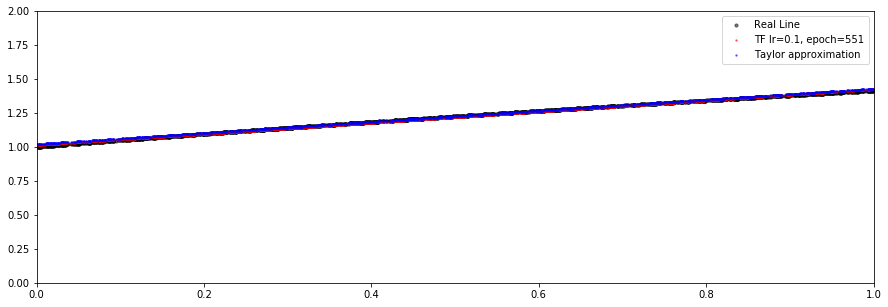

In [235]:
plt.figure(figsize=(15,5))

plt.scatter(X_test, y_test, color='k', label='Real Line', s=10, alpha=0.5)
plt.scatter(X_test, y_pred_tf, color='r', label='TF lr=0.1, epoch=551', s=2, alpha=0.5)
plt.scatter(X_test, T1, color='b', label='Taylor approximation', s=2, alpha=0.5)
 
plt.xlim(0, 1)
plt.ylim(0, 2)      

plt.legend()
plt.show()